In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
subspecies = pd.read_csv("Data/mgSs.coverage.stats.csv").rename(columns={"Unnamed: 0" : "subspecies"})
subspecies = subspecies['subspecies']
taxaKey = pd.read_csv("/Users/amaros/Desktop/mgss2/VIRGO2_taxaKey_all_gardnerella.csv")

def lighter_colors(base_color, num_colors):
    # Convert the base color to its RGB components
    r = int(base_color[1:3], 16)
    g = int(base_color[3:5], 16)
    b = int(base_color[5:7], 16)

    # Calculate the step values for degrading
    r_step = (255 - r) / num_colors
    g_step = (255 - g) / num_colors
    b_step = (255 - b) / num_colors

    # Generate the progressively lighter colors
    lighter_colors = []
    for i in range(num_colors):
        new_r = int(r + i * r_step)
        new_g = int(g + i * g_step)
        new_b = int(b + i * b_step)
        lighter_colors.append(f'#{new_r:02X}{new_g:02X}{new_b:02X}')

    return lighter_colors

species = subspecies.apply(lambda x : x.split(".")[0])
couleur = []
for i,j in zip(list(species.value_counts().sort_index().index), species.value_counts().sort_index()) :
    if i in taxaKey['Taxa'].values:
        a = taxaKey[taxaKey['Taxa'] == i]['Color'].values[0]
        couleur.append(lighter_colors(a,j))
    else :
        couleur.append(['#8c8c8c']*j)

# Original list with single elements and sublists
original_list = couleur
# Create a new list with only the single elements
new_list = [item for sublist in original_list for item in (sublist if isinstance(sublist, list) else [sublist])]

# subspecies_with_colors = pd.DataFrame({"Subspecies" : subspecies, "Color" : new_list})
# subspecies_with_colors.to_csv("Data/subspecies_with_colors.csv", index=False)
# subspecies_with_colors.head()

,Subspecies,Color
0,Actinotignum_sanguinis.1,#8c8c8c
1,Actinotignum_sanguinis.2,#8c8c8c
2,Aerococcus_christensenii.1,#616161
3,Aerococcus_christensenii.2,#7B7B7B
4,Aerococcus_christensenii.3,#959595


In [9]:
# Variation of colors between 2 kind of blues for Gardnerella : this generate 58 variation of blues
def interpolate_color(color1, color2, num_steps):
    # Convert hex colors to RGB tuples
    color1 = tuple(int(color1[i:i+2], 16) for i in (1, 3, 5))
    color2 = tuple(int(color2[i:i+2], 16) for i in (1, 3, 5))

    color_variations = []

    for step in range(num_steps):
        r = int(color1[0] + (color2[0] - color1[0]) * step / (num_steps - 1))
        g = int(color1[1] + (color2[1] - color1[1]) * step / (num_steps - 1))
        b = int(color1[2] + (color2[2] - color1[2]) * step / (num_steps - 1))

        # Convert RGB to hex
        hex_color = "#{:02X}{:02X}{:02X}".format(r, g, b)

        color_variations.append(hex_color)

    return color_variations

# Example usage:
color1 = "#221886"  # Blue
color2 = "#9A98BF"  # Cyan (light blue)
num_steps = 58  # Number of variations

variations = interpolate_color(color1, color2, num_steps)
print(variations)


['#221886', '#241A87', '#261C88', '#281E89', '#2A208A', '#2C238B', '#2E258C', '#30278D', '#32298E', '#342C8F', '#372E90', '#393091', '#3B3292', '#3D3593', '#3F3794', '#413995', '#433B96', '#453E97', '#474098', '#4A4299', '#4C449A', '#4E479B', '#50499C', '#524B9D', '#544D9E', '#56509F', '#5852A0', '#5A54A1', '#5C56A2', '#5F59A3', '#615BA4', '#635DA5', '#655FA6', '#6762A7', '#6964A8', '#6B66A9', '#6D68AA', '#6F6BAB', '#726DAC', '#746FAD', '#7671AE', '#7874AF', '#7A76B0', '#7C78B1', '#7E7AB2', '#807DB3', '#827FB4', '#8481B5', '#8783B6', '#8986B7', '#8B88B8', '#8D8AB9', '#8F8CBA', '#918FBB', '#9391BC', '#9593BD', '#9795BE', '#9A98BF']


In [40]:
mgcsts_samples = pd.read_csv("Data/mgCSTs.samples.df.csv")
mgCSTs_sort = pd.read_csv("Data/mgCSTs.sort.df.csv")
subspecies_with_colors = pd.read_csv("/Users/amaros/Desktop/mgss2/streamlit_app/Data/subspecies_with_colors.csv")
data = mgcsts_samples
data2 = mgCSTs_sort
# deepsplit = 4
# mincluster = 30

# data = mgcsts_samples[(mgcsts_samples['deepSplit'] == deepsplit) & (mgcsts_samples['minClusterSize'] == mincluster)]
# data = data.reset_index(drop = True)

# data2 = mgCSTs_sort[(mgCSTs_sort['deepSplit'] == deepsplit) & (mgCSTs_sort['minClusterSize'] == mincluster)]
# data2 = data2.reset_index(drop = True)


# count_sample = []
# for element in data2['dtc'].values :
#     count_sample.append(data.groupby(['dtc']).count()['sampleID'][element])
# data2['count_sample'] = count_sample

color_sort = []
for element in data2['domTaxa'].values :
    a = subspecies_with_colors[subspecies_with_colors['Subspecies'].apply(lambda x : x.replace(".", "_")) == element]['Color'].values
    if a.size > 0 :
        color_sort.append(a[0])
    else :
        color_sort.append("#8c8c8c")
data2['color_mgCST'] = color_sort

data2.to_csv("/Users/amaros/Desktop/mgss2/streamlit_app/Data/mgCST_sort_color.csv", index=False)

color_samples = []
for element in data['domTaxa'].values :
    a = subspecies_with_colors[subspecies_with_colors['Subspecies'].apply(lambda x : x.replace(".", "_")) == element]['Color'].values
    if a.size > 0 :
        color_samples.append(a[0])
    else :
        color_samples.append("#8c8c8c")
data['color_domTaxa'] = color_samples

data.to_csv("/Users/amaros/Desktop/mgss2/streamlit_app/Data/mgCST_samples_color.csv", index=False)


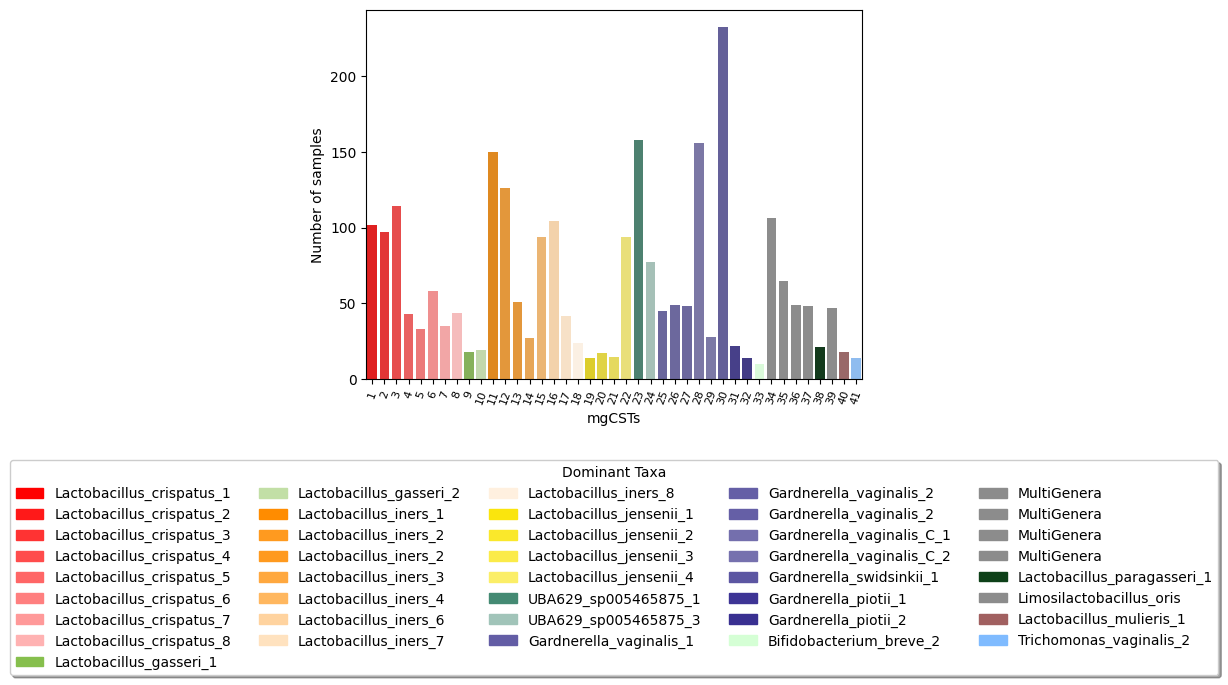

In [4]:
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

deepsplit = 4
mincluster = 10

data2 = pd.read_csv('Data/mgCST_sort_color.csv')
data2 = data2[(data2['deepSplit'] == deepsplit) & (data2['minClusterSize'] == mincluster)]
data2 = data2.reset_index(drop = True)

data = pd.read_csv('Data/mgCST_samples_color.csv')
data = data[(data['deepSplit'] == deepsplit) & (data['minClusterSize'] == mincluster)]
data = data.reset_index(drop = True)


count_sample = []
for element in data2['dtc'].values :
    count_sample.append(data.groupby(['dtc']).count()['sampleID'][element])
data2['count_sample'] = count_sample

mpatches.Patch(color = (1.0, 0.09803921568627451, 0.09803921568627451, 1.0), label = "test")
g = sns.barplot(x = 'mgCST', y = 'count_sample', data = data2 , legend = False, hue = 'mgCST', palette=list(data2['color_mgCST']))
fig1 = g.figure
plt.xlabel("mgCSTs")
plt.ylabel("Number of samples")
g.tick_params(axis='x', which='major', labelsize= 8, labelrotation=70)
# g.legend(title = 'mgCSTs',loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol = 5)
new_legend = data2['color_mgCST'].apply(lambda x : mcolors.to_rgba(x)).values

new_patch = []
for i,j in zip(new_legend, data2['domTaxa'].values) :
    new_patch.append(mpatches.Patch(color = i, label = j))

g.legend(handles=new_patch, title = 'Dominant Taxa',loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol = 5)
g.grid(False)